In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import itertools
from itertools import chain

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv


In [3]:
data=pd.read_csv('../input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')

In [4]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
data.shape

(569, 6)

In [6]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [7]:
col_name=['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','diagnosis']

for col in col_name:
    print(data[col].value_counts)

<bound method IndexOpsMixin.value_counts of 0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: mean_radius, Length: 569, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      10.38
1      17.77
2      21.25
3      20.38
4      14.34
       ...  
564    22.39
565    28.25
566    28.08
567    29.33
568    24.54
Name: mean_texture, Length: 569, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      122.80
1      132.90
2      130.00
3       77.58
4      135.10
        ...  
564    142.00
565    131.20
566    108.30
567    140.10
568     47.92
Name: mean_perimeter, Length: 569, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
564    1479.0
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: mean_area, Length: 569, dtype: float64>
<bound method IndexOpsMixin.value_co

In [8]:
X=data.drop(['diagnosis'], axis=1)
Y=data['diagnosis']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.33, random_state=42) 

In [10]:
X_train.shape, X_test.shape


((381, 5), (188, 5))

In [11]:
X_train.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
172,15.46,11.89,102.50,736.9,0.12570
407,12.85,21.37,82.63,514.5,0.07551
56,19.21,18.57,125.50,1152.0,0.10530
497,12.47,17.31,80.45,480.1,0.08928
301,12.46,19.89,80.43,471.3,0.08451


In [12]:
import category_encoders as ce

In [13]:
encoder=ce.OrdinalEncoder(col_name)
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [14]:
X_train.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
172,15.46,11.89,102.50,736.9,0.12570
407,12.85,21.37,82.63,514.5,0.07551
56,19.21,18.57,125.50,1152.0,0.10530
497,12.47,17.31,80.45,480.1,0.08928
301,12.46,19.89,80.43,471.3,0.08451


In [15]:
X_test.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
204,12.47,18.60,81.09,481.9,0.09965
70,18.94,21.31,123.60,1130.0,0.09009
131,15.46,19.48,101.70,748.9,0.10920
431,12.40,17.68,81.47,467.8,0.10540
540,11.54,14.44,74.65,402.9,0.09984


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
mod_gini= DecisionTreeClassifier(criterion='gini', max_depth=4 ,random_state=0)
mod_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [18]:
y_pred_gini=mod_gini.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred_gini))

0.9308510638297872


In [20]:
y_pred_train=mod_gini.predict(X_train)
print(accuracy_score(Y_train,y_pred_train))

0.937007874015748


In [21]:
print(mod_gini.score(X_train, Y_train))
print(mod_gini.score(X_test,Y_test))

0.937007874015748
0.9308510638297872


[Text(558.0, 978.48, 'X[2] <= 92.775\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(329.72727272727275, 761.0400000000001, 'X[4] <= 0.126\ngini = 0.17\nsamples = 234\nvalue = [22, 212]'),
 Text(202.9090909090909, 543.6, 'X[1] <= 18.635\ngini = 0.145\nsamples = 229\nvalue = [18, 211]'),
 Text(101.45454545454545, 326.1600000000001, 'X[2] <= 90.63\ngini = 0.041\nsamples = 142\nvalue = [3, 139]'),
 Text(50.72727272727273, 108.72000000000003, 'gini = 0.028\nsamples = 139\nvalue = [2, 137]'),
 Text(152.1818181818182, 108.72000000000003, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(304.3636363636364, 326.1600000000001, 'X[4] <= 0.103\ngini = 0.285\nsamples = 87\nvalue = [15, 72]'),
 Text(253.63636363636363, 108.72000000000003, 'gini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(355.09090909090907, 108.72000000000003, 'gini = 0.499\nsamples = 19\nvalue = [9, 10]'),
 Text(456.54545454545456, 543.6, 'X[1] <= 14.215\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(405.818181

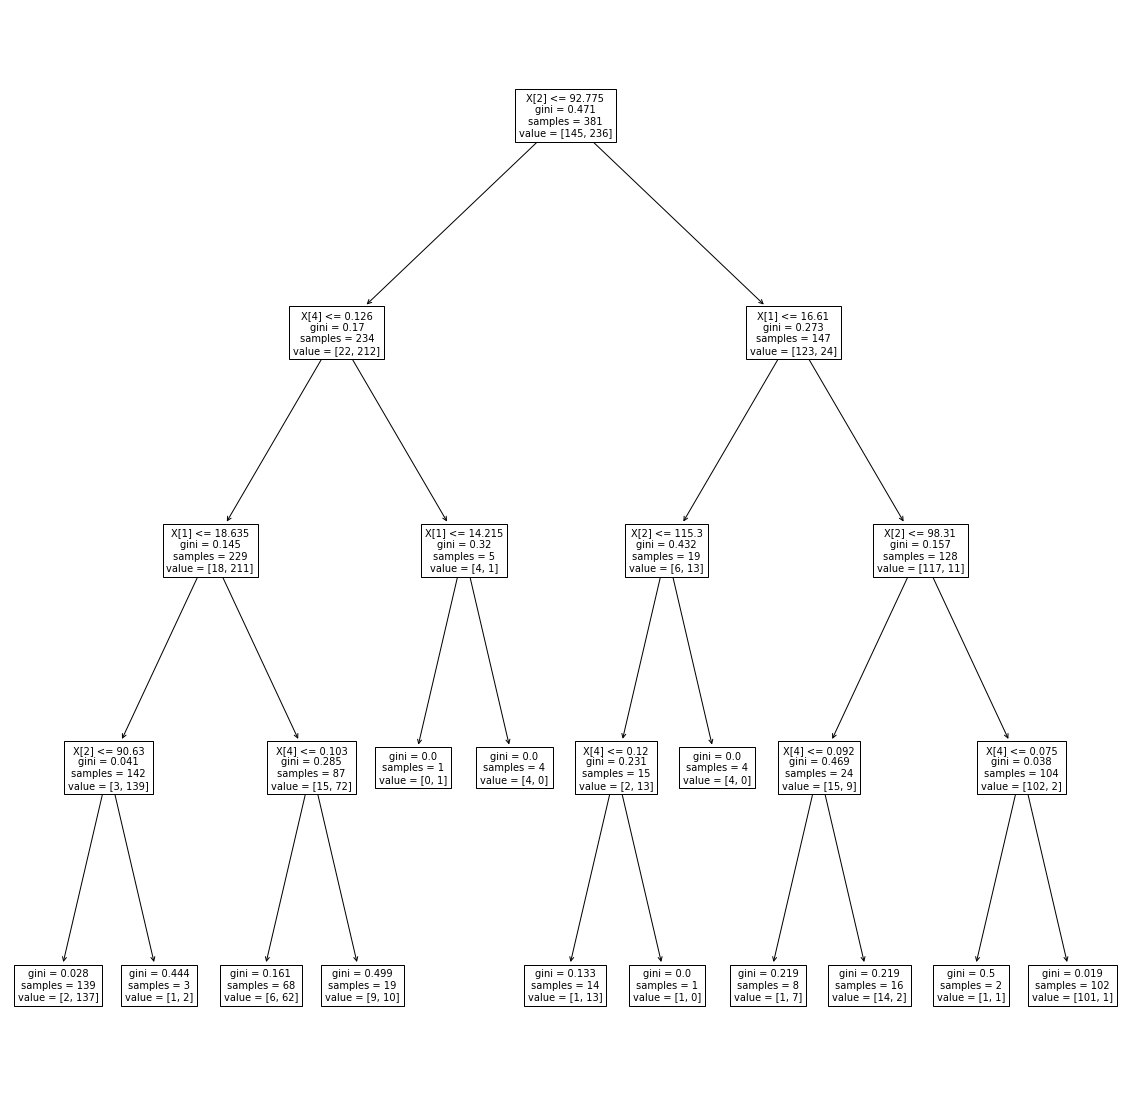

In [22]:
plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(mod_gini.fit(X_train, Y_train))


In [23]:
mod_en=DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
mod_en.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [24]:
y_pred_en=mod_en.predict(X_test)

In [25]:
print(accuracy_score(Y_test, y_pred_en))

0.925531914893617


In [26]:
y_pred_train_en=mod_en.predict(X_train)
print(accuracy_score(Y_train, y_pred_train_en))

0.9291338582677166


[Text(647.28, 978.48, 'X[2] <= 99.79\nentropy = 0.958\nsamples = 381\nvalue = [145, 236]'),
 Text(357.12, 761.0400000000001, 'X[2] <= 85.25\nentropy = 0.592\nsamples = 266\nvalue = [38, 228]'),
 Text(178.56, 543.6, 'X[4] <= 0.109\nentropy = 0.301\nsamples = 187\nvalue = [10, 177]'),
 Text(89.28, 326.1600000000001, 'X[1] <= 22.455\nentropy = 0.134\nsamples = 160\nvalue = [3, 157]'),
 Text(44.64, 108.72000000000003, 'entropy = 0.06\nsamples = 144\nvalue = [1, 143]'),
 Text(133.92000000000002, 108.72000000000003, 'entropy = 0.544\nsamples = 16\nvalue = [2, 14]'),
 Text(267.84000000000003, 326.1600000000001, 'X[1] <= 15.575\nentropy = 0.826\nsamples = 27\nvalue = [7, 20]'),
 Text(223.2, 108.72000000000003, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(312.48, 108.72000000000003, 'entropy = 0.918\nsamples = 21\nvalue = [7, 14]'),
 Text(535.6800000000001, 543.6, 'X[1] <= 16.61\nentropy = 0.938\nsamples = 79\nvalue = [28, 51]'),
 Text(446.4, 326.1600000000001, 'X[4] <= 0.127\nentropy =

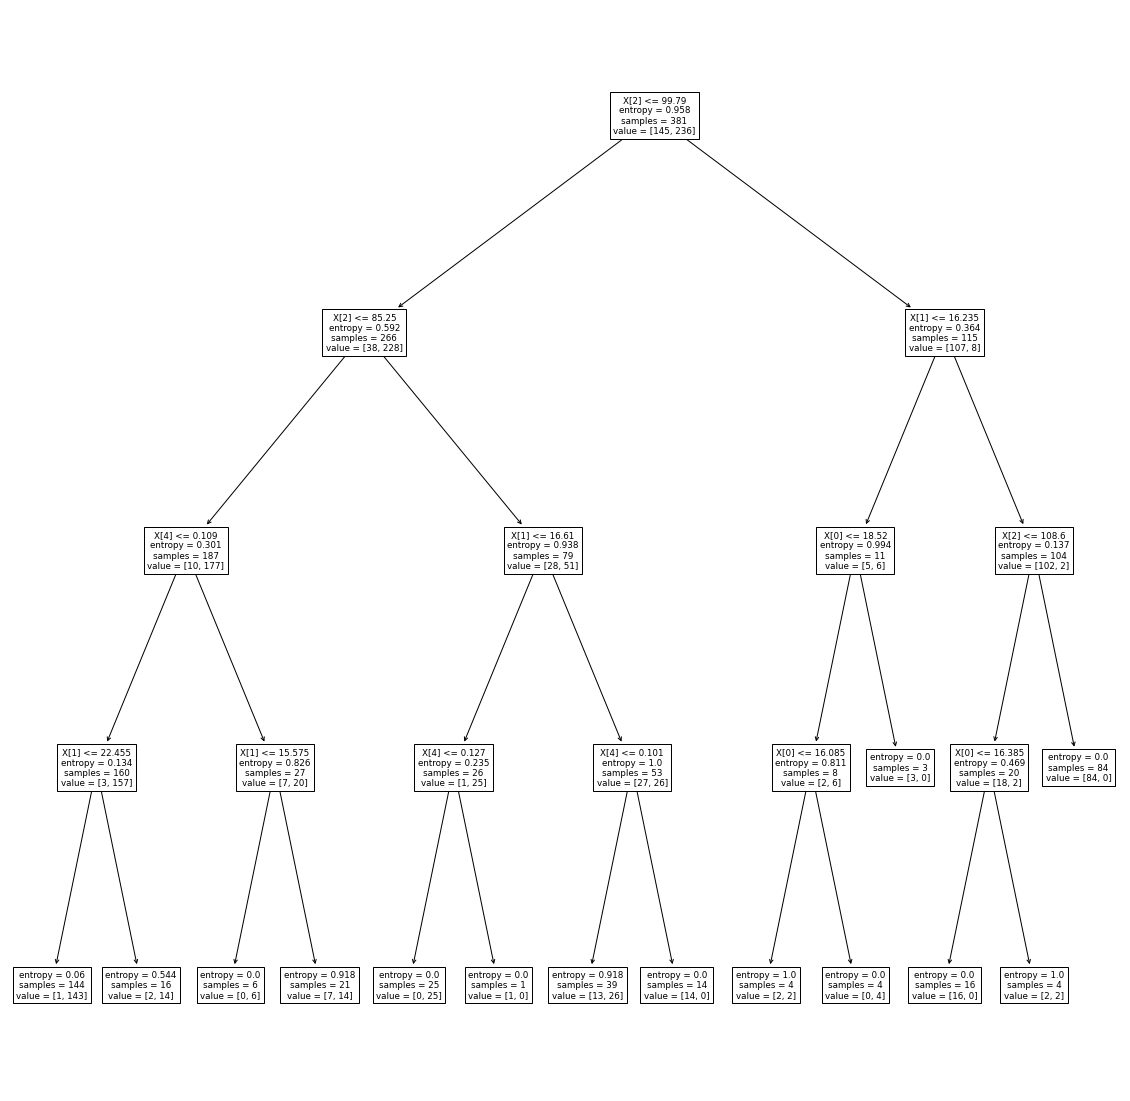

In [27]:
plt.figure(figsize=(20,20))
tree.plot_tree(mod_en.fit(X_train, Y_train))

In [28]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Reds) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

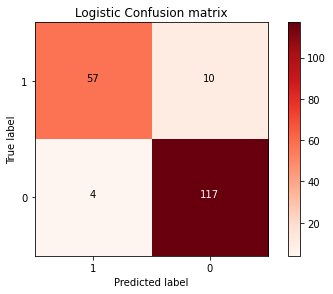

In [29]:
cm = confusion_matrix(Y_test, y_pred_en)
class_names = [1,0]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()
